In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE




In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/train.csv', delimiter = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
test_df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/test.csv', delimiter=';')
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


For our initial observations before analysis to train out model, we will explore potential patterns and key factors within the dataset

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
# Check overall shape of the dataframe
df.shape

(45211, 17)

In [6]:
# Check Data ranges for the numerical columns 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#Ensure there are no null values within the dataset
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
# The outcome variable is currently interpreted as a string, will format to a binary numeral value with (0 : 'No' and 1 : Yes)
df['y'] = df['y'].map({'no': 0, 'yes': 1})

## Exploratory Data Analysis (EDA)

We will further examine specifically elements of each column to determine their relevance in accordance to having an overall effect on our outcome variable being customers who have subscribed to a term deposit.

INITIAL GROUP BY OBSERVATIONS

In [10]:
#Single people have highest chance of subscribing
df.groupby(['marital'], as_index=False)['y'].mean()

,marital,y
0,divorced,0.119455
1,married,0.101235
2,single,0.149492


CHARTS AND VISUAL OBSERVATIONS

In [11]:
#Isolating users who have subscribed to observe potential similarities users would have when subscribing
sub_df = df[df['y'] == 1]
notsubbed = df[df['y'] == 0]

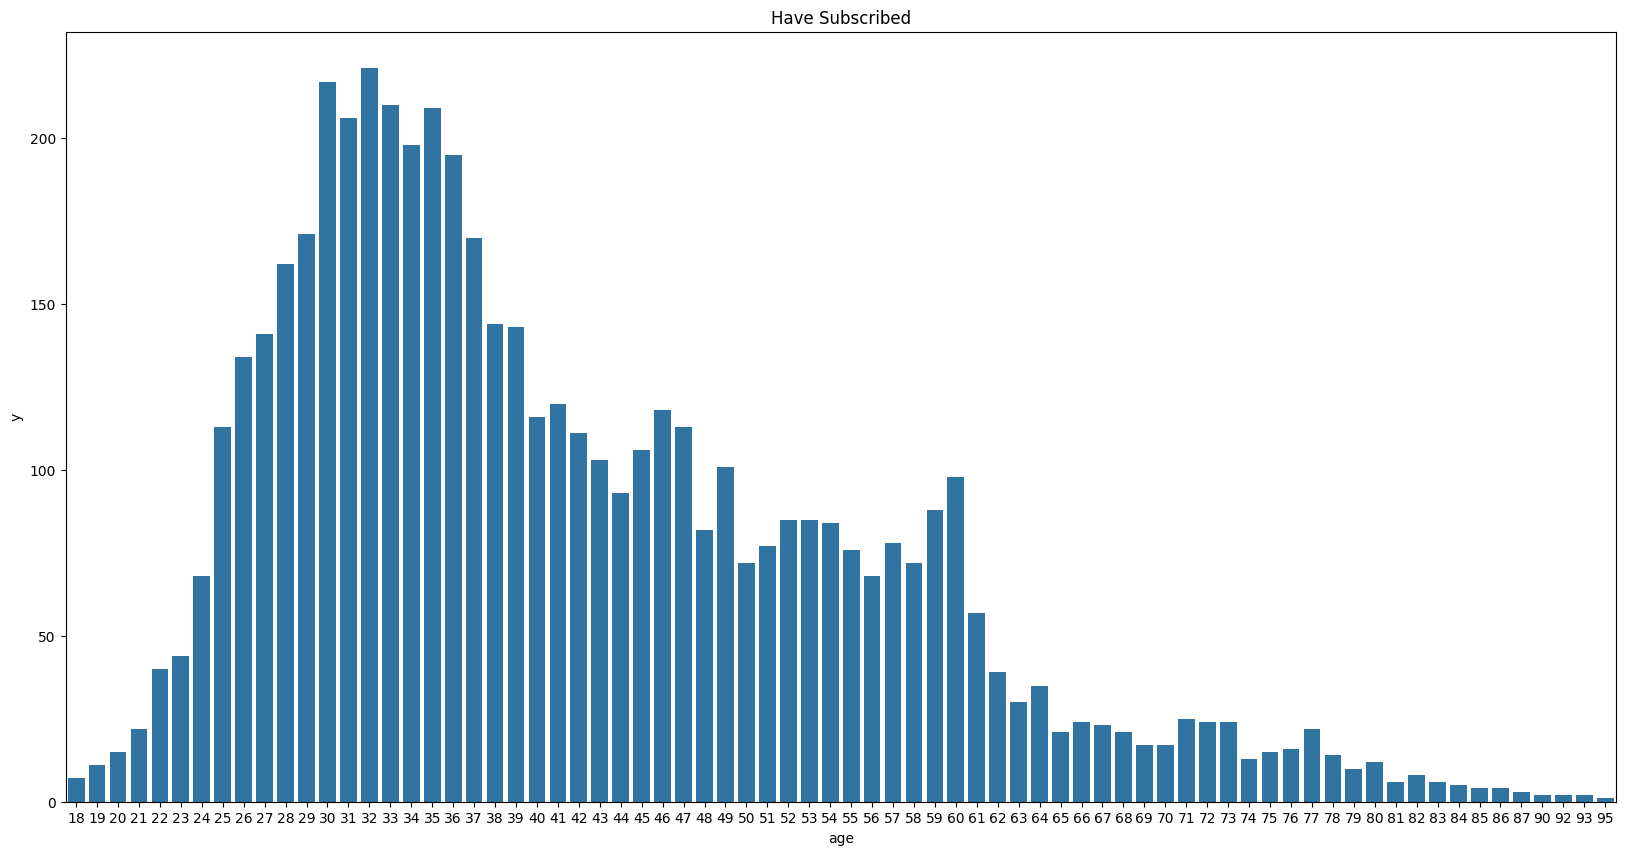

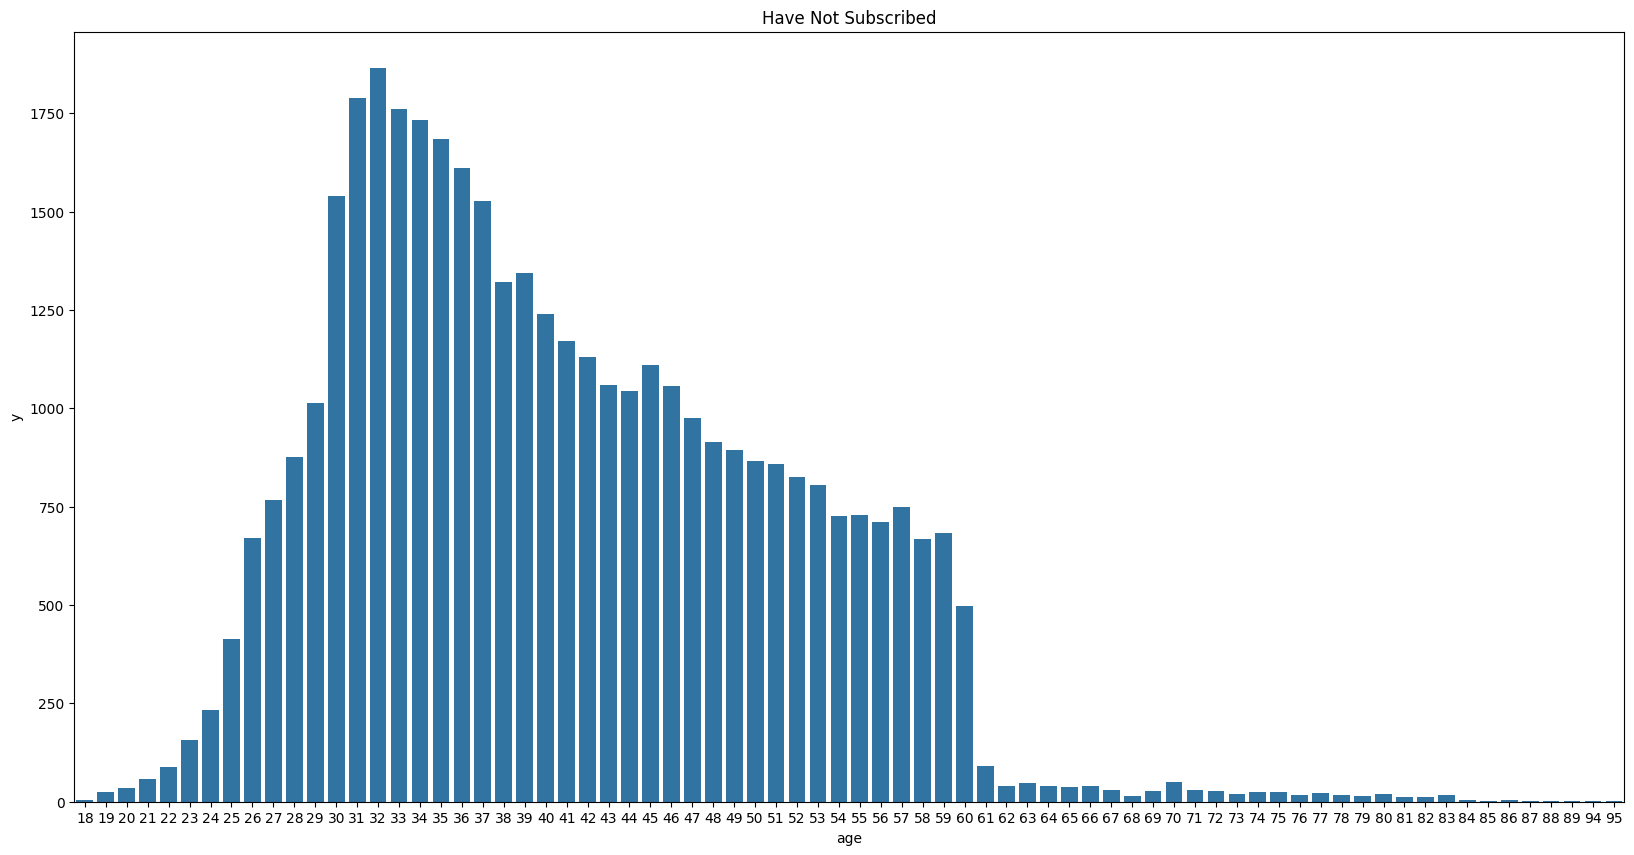

In [12]:
sub_age = sub_df.groupby('age')

# generate bar plot for how many customers have subscribed per age

plt.figure(figsize=(20,10))
sns.barplot(x=sub_age['y'].sum().index, y=sub_age['y'].sum())
plt.title("Have Subscribed")
plt.show()


# check for people who have not subscribed
notsubbed_Age = notsubbed.groupby('age')
# using count here since sum of all who have not subscribed would be 0
plt.figure(figsize=(20,10))
sns.barplot(x=notsubbed_Age['y'].count().index, y=notsubbed_Age['y'].count())
plt.title("Have Not Subscribed")
plt.show()

From the charts above, we can observe observations for those who have subscribed and not subscribed are relatively positively skewed

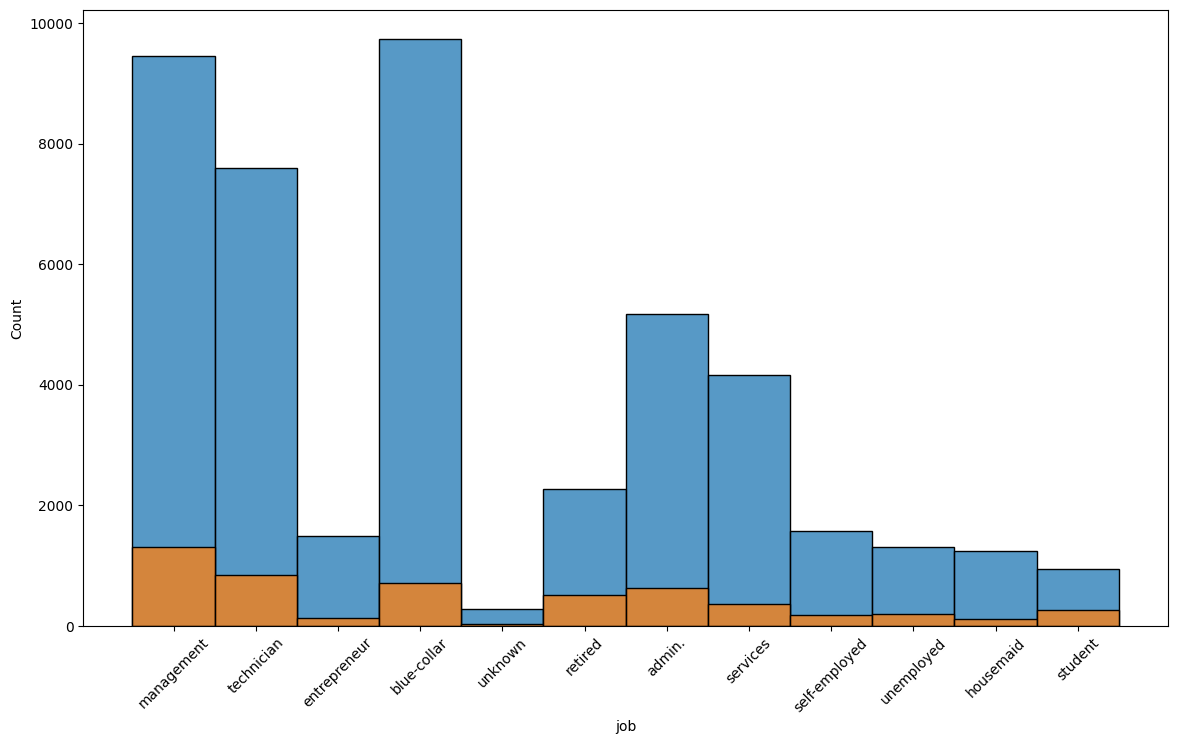

In [13]:
#It seems majority of customers who subscribed to a term deposit most commonly had the occupation as a manager, technician, admin, or blue-coller

plt.figure(figsize=(14,8))
sns.histplot(x=df['job'])
sns.histplot(x=sub_df['job'])
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='marital', ylabel='Count'>

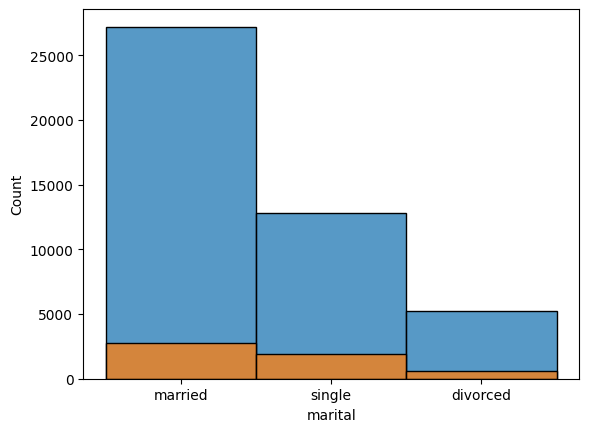

In [14]:
#Those who have subscribed are also observed that they are individuals who are married.

sns.histplot(x=df['marital'])
sns.histplot(x=sub_df['marital'])

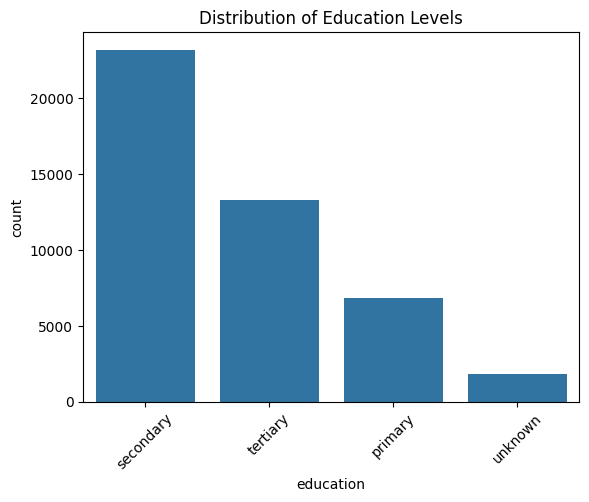

In [15]:
df_education_counts = df['education'].value_counts().reset_index()
df_education_counts.columns = ['education', 'count']

# Plot
sns.barplot(x='education', y='count', data=df_education_counts)
plt.xticks(rotation=45) 
plt.title('Distribution of Education Levels')
plt.show()

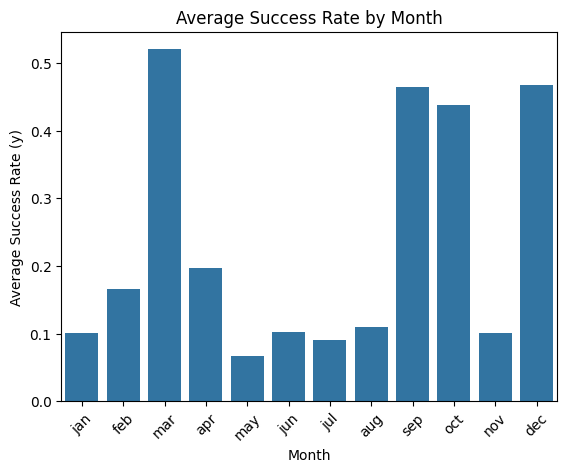

In [16]:
#Checking to see the average success rate each month for customers who have subscribed

month_success_rate = df.groupby(['month'], as_index=False)['y'].mean()


month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_success_rate['month'] = pd.Categorical(month_success_rate['month'], categories=month_order, ordered=True)
month_success_rate = month_success_rate.sort_values('month')

# Plot using seaborn
sns.barplot(x='month', y='y', data=month_success_rate)
plt.xlabel('Month')
plt.ylabel('Average Success Rate (y)')
plt.title('Average Success Rate by Month')
plt.xticks(rotation=45)  
plt.show()

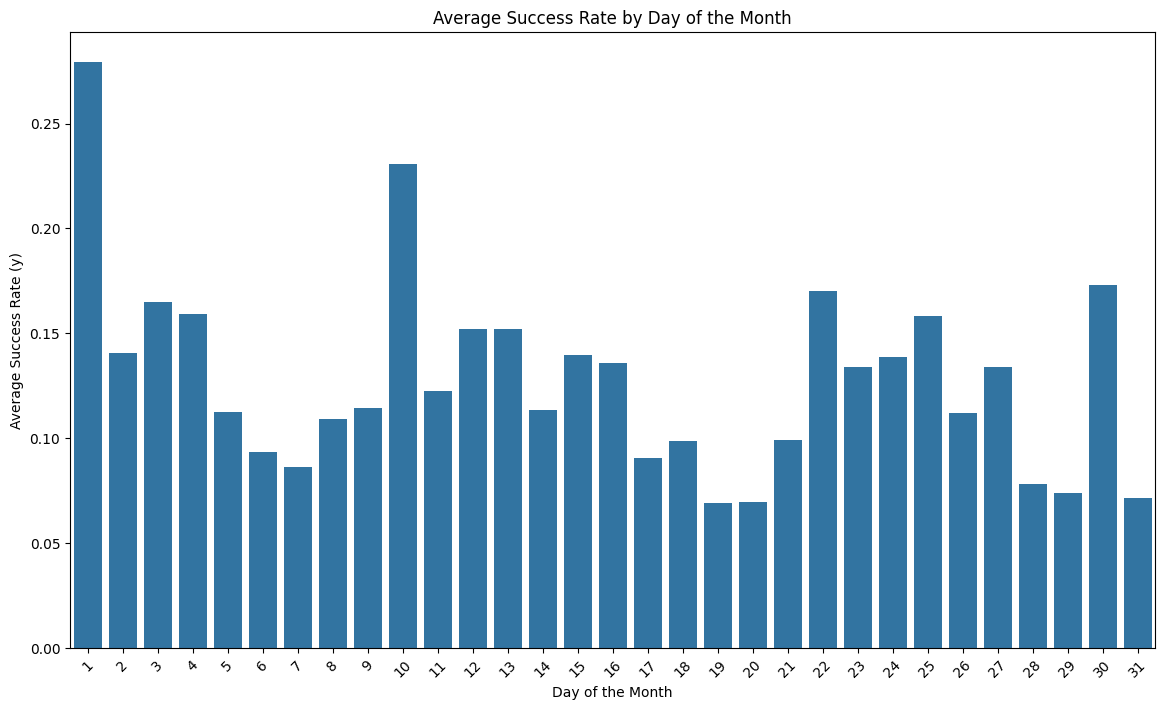

In [17]:
#Now observing if there is a specific day where customers tend to subscribe to term deposits, it seems the first and the 10th see the highest rate of success

day_success_rate = df.groupby(['day'], as_index=False)['y'].mean()
plt.figure(figsize=(14,8))
sns.barplot(x='day', y='y', data=day_success_rate)

plt.xlabel('Day of the Month')
plt.ylabel('Average Success Rate (y)')
plt.title('Average Success Rate by Day of the Month')
plt.xticks(rotation=45)  
plt.show()

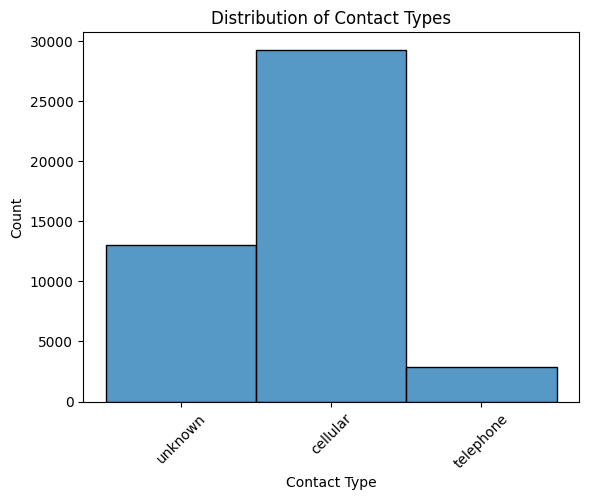

In [18]:
sns.histplot(df['contact'])

# Customize the plot
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title('Distribution of Contact Types')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

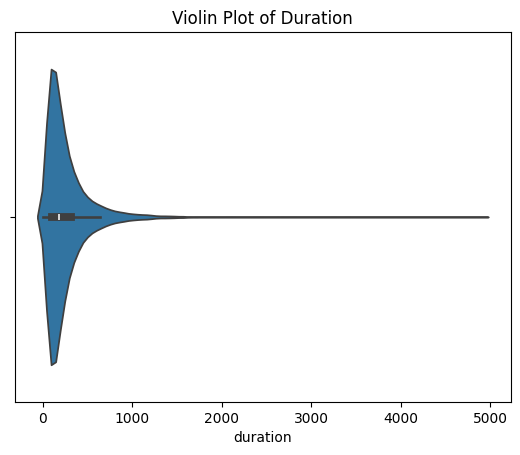

In [19]:
sns.violinplot(x=df['duration'])
plt.title('Violin Plot of Duration')
plt.show()

C:\Users\etiem\AppData\Local\Temp\ipykernel_131768\1139628751.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['duration'], shade=True)


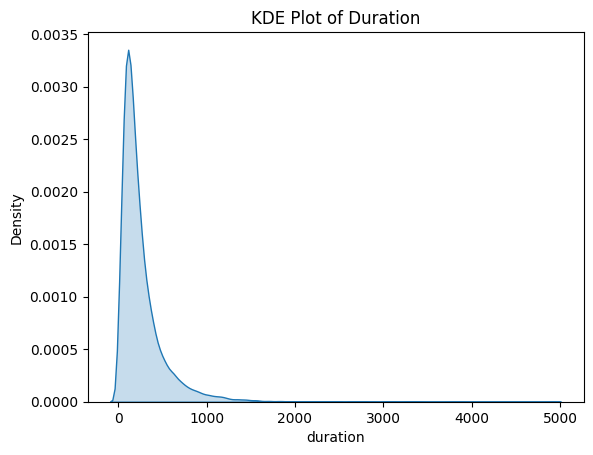

In [20]:
#Kde plot reveals majority of the observations between -1 to around 800 seconds in duration with large outliers included.

sns.kdeplot(df['duration'], shade=True)
plt.title('KDE Plot of Duration')
plt.show()

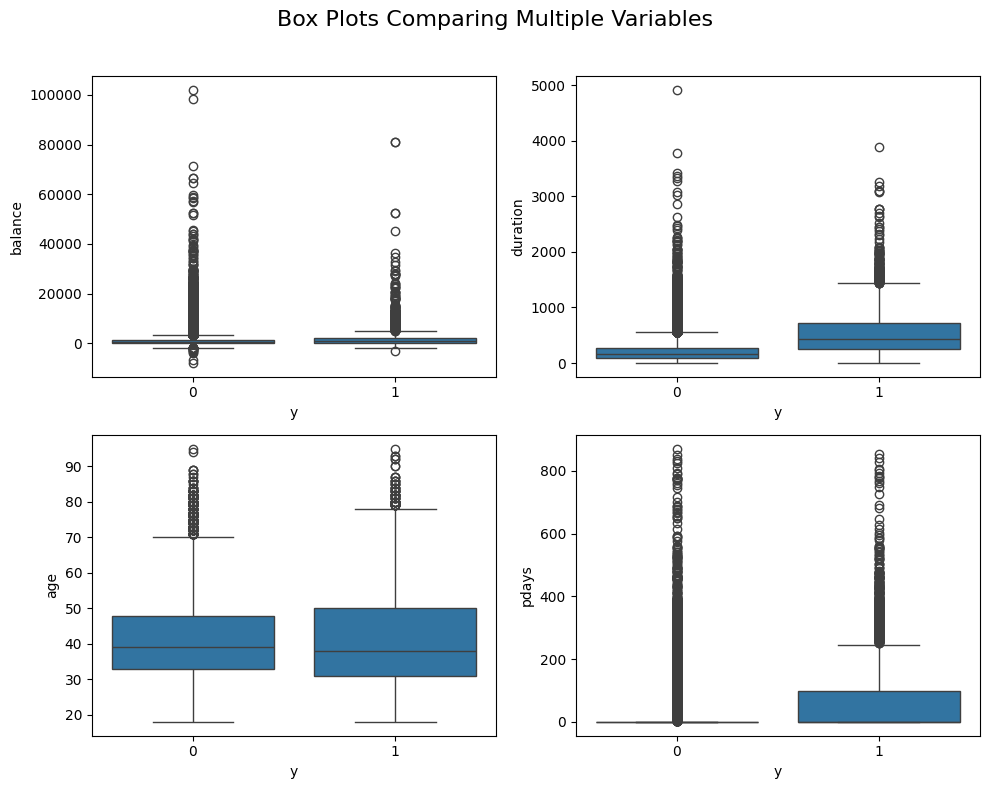

In [21]:
#More plots for the users that have subscribed - comparison using boxplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

fig.suptitle('Box Plots Comparing Multiple Variables', fontsize=16)

sns.boxplot(x='y', y='balance', data=df, ax=ax1)
sns.boxplot(x='y', y='duration', data=df, ax=ax2)
sns.boxplot(x='y', y='age', data=df, ax=ax3)
sns.boxplot(x='y', y='pdays', data=df, ax=ax4)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [22]:
#Label encoder to categorize them in a numerical output instead of strings. This can allow for better interpretability with our future models

labelecoder = LabelEncoder()

enc_df = df.copy()

encoding_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in encoding_col:
    enc_df[col] = labelecoder.fit_transform(enc_df[col])

enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


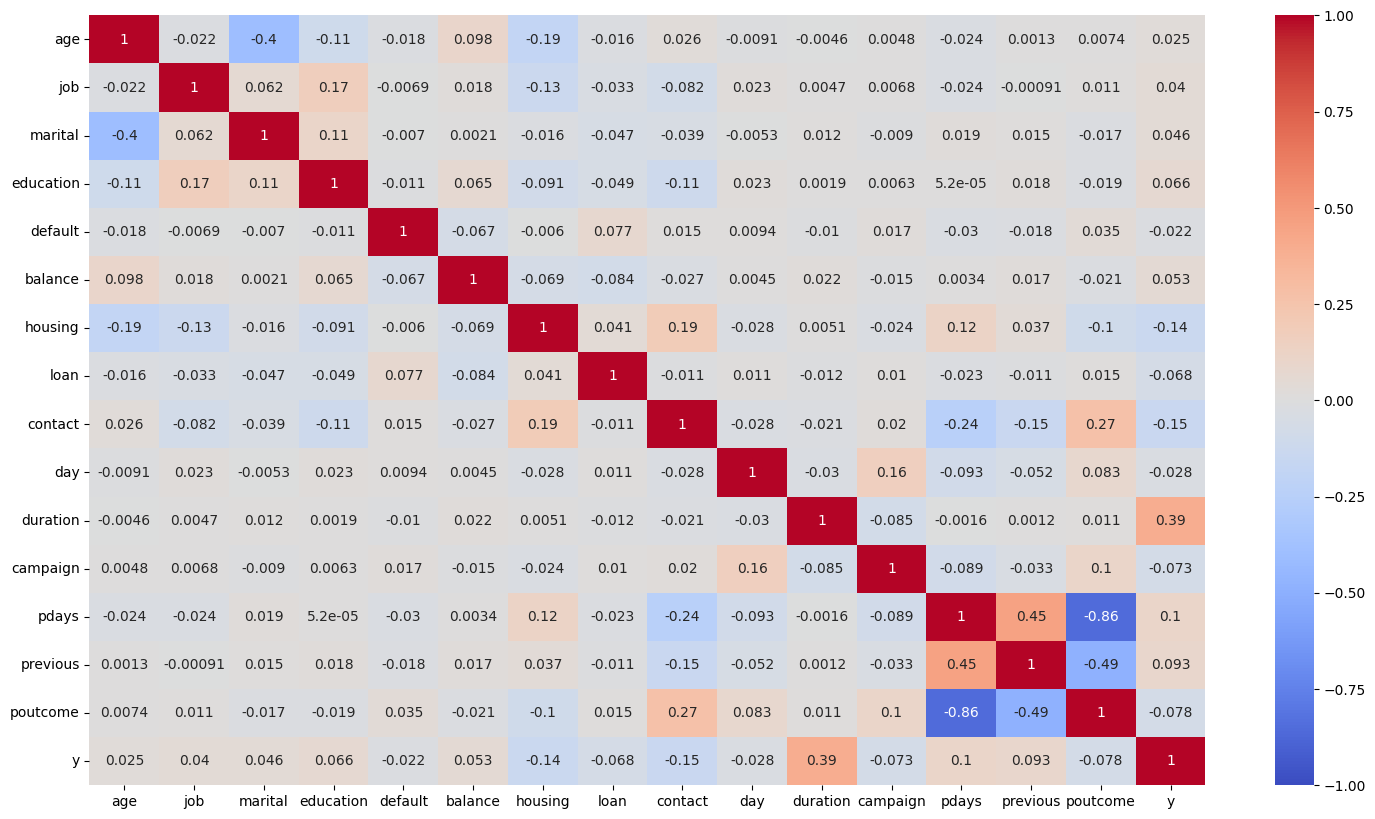

C:\Users\etiem\AppData\Local\Temp\ipykernel_131768\4099975737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')


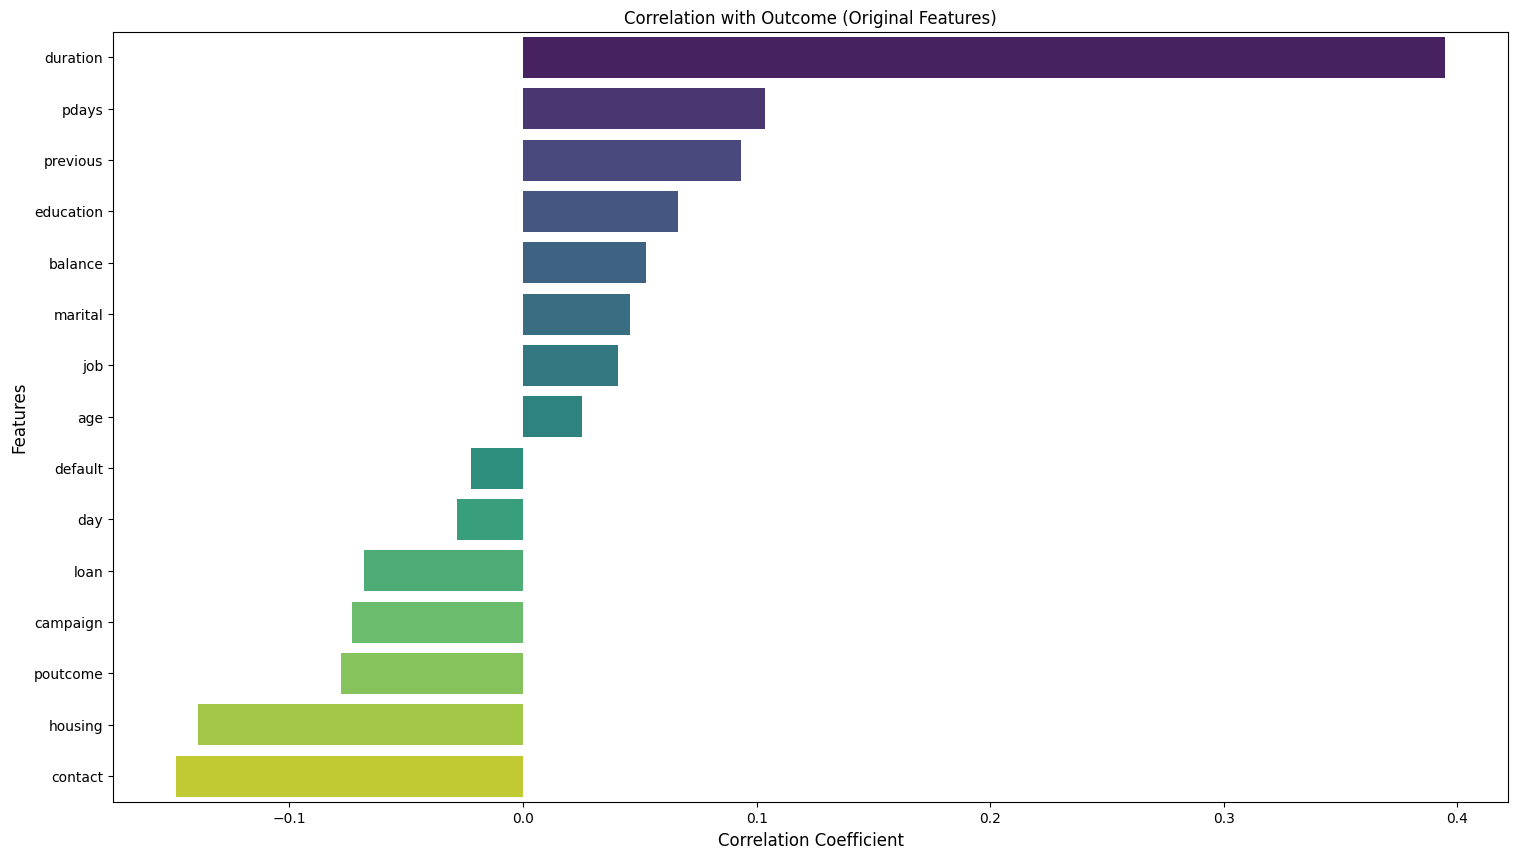

In [23]:
# Correlation matrix and heatmap with the multiple encoded variables

corr_matrix = enc_df.corr(numeric_only=True)
sub_corr = corr_matrix['y'].drop('y').sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#Correlation Matrix
plt.figure(figsize=(18,10))
sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')
plt.title('Correlation with Outcome (Original Features)')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

Duration seems to have the highest correlation with the outcome variable with pdays and previous having the next largest positive correlation. Balance and pdays could be less of a factor once outliers have been dealt with.

Contact and housing have the largest negative correlations with the outcome variable. This would potentially insuinate the method of which the customer is receiving the campaign or if they have a mortgage of not could have opposing effects on if they buy a term deposit or not.

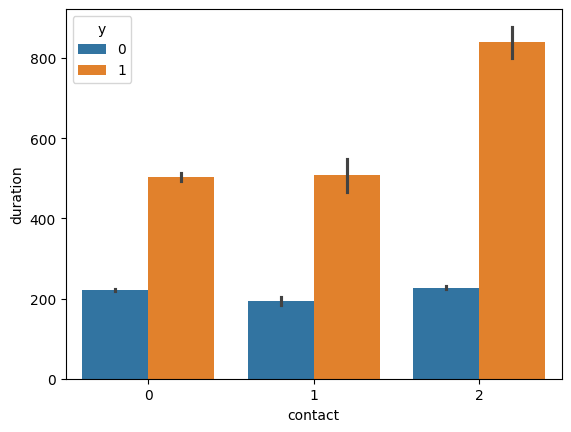

In [24]:
#Going to further explore the duration, contact, and housing variables

sns.barplot(x='contact', y='duration', hue='y', data=enc_df)
plt.show()

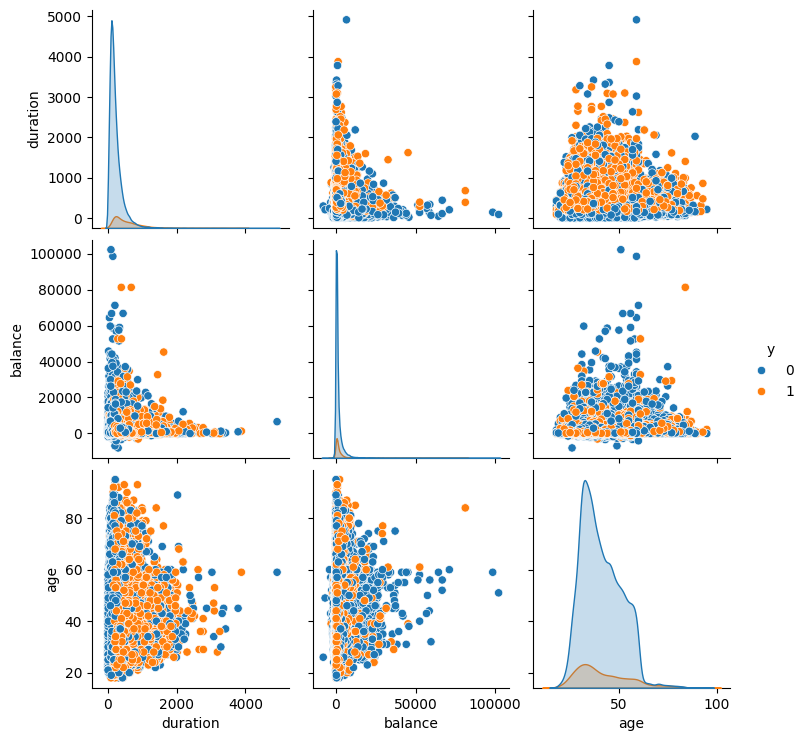

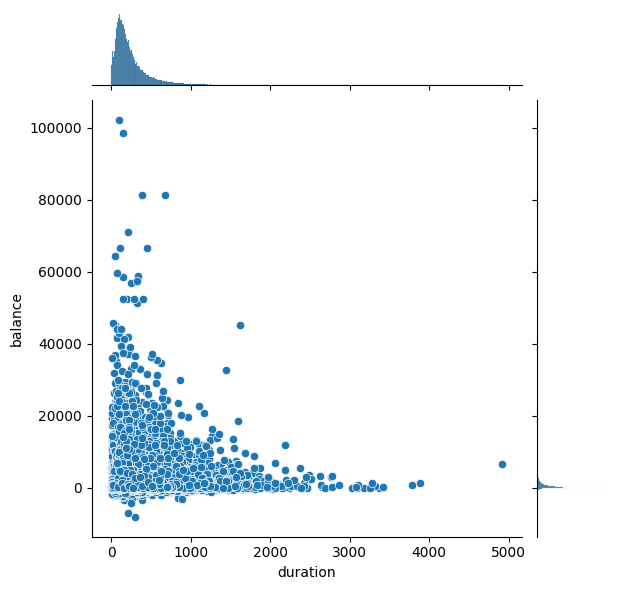

In [25]:
#Scatter and pair plot to spot any patterns within the observations
sns.pairplot(enc_df[['duration', 'balance', 'age', 'y']], hue='y')
sns.jointplot(x='duration', y='balance', data=enc_df, kind='scatter')

## Feature Engineering

Converting the Day and Month column to its own datetime feature, adding a year column into the dataframe
Convert the continuous variable of "Balance" into a categorical variable
Bin the duration column
Changing the age variable into a categorical as well.

In [26]:
enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0


In [27]:
#Change age into bins
enc_df['age_cut'] = pd.qcut(enc_df['age'], 6)


In [28]:
#Individuals aged 52+ and under 31 were most likely to subscribe to a term deposit
enc_df.groupby(['age_cut'], as_index=False)['y'].mean()

C:\Users\etiem\AppData\Local\Temp\ipykernel_131768\4022047265.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  enc_df.groupby(['age_cut'], as_index=False)['y'].mean()


,age_cut,y
0,"(17.999, 31.0]",0.149679
1,"(31.0, 35.0]",0.106332
2,"(35.0, 39.0]",0.101007
3,"(39.0, 45.0]",0.087691
4,"(45.0, 52.0]",0.092045
5,"(52.0, 95.0]",0.155373


In [29]:
#Create a new year column and aggregating to create a Date/Time Function

year = 2008
years = []

# Loop through each row of the DataFrame -- Understand how this works
for index, row in df.iterrows():
    # If the month is 'dec', assign the current year and then increment for the next rows
    if row['month'] == 'dec' and index > 0 and df.iloc[index - 1]['month'] != 'dec':
        years.append(year)
        year += 1
    else:
        years.append(year)

enc_df['year'] = years

enc_df['date'] = pd.to_datetime(df['day'].astype(str) + '-' + enc_df['month'] + '-' + enc_df['year'].astype(str), format='%d-%b-%Y') 
enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut,year,date
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0,"(52.0, 95.0]",2008,2008-05-05
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0,"(39.0, 45.0]",2008,2008-05-05
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0,"(31.0, 35.0]",2008,2008-05-05
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0,"(45.0, 52.0]",2008,2008-05-05
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0,"(31.0, 35.0]",2008,2008-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1,"(45.0, 52.0]",2010,2010-11-17
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1,"(52.0, 95.0]",2010,2010-11-17
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1,"(52.0, 95.0]",2010,2010-11-17
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0,"(52.0, 95.0]",2010,2010-11-17


In [30]:
#Creating Duration into quantiles

enc_df['duration_bin'] = pd.qcut(enc_df['duration'], q=5, labels=False)
enc_df.groupby(['duration_bin'], as_index=False)['y'].mean()


,duration_bin,y
0,0,0.007249
1,1,0.037201
2,2,0.079318
3,3,0.130551
4,4,0.331710


In [31]:
# Assuming 'date' column exists and is in datetime format
# Find the maximum date (most recent contact)
max_date = enc_df['date'].max()

# Calculate the difference between the max_date and each row in the 'date' column
enc_df['last_contacted'] = (max_date - enc_df['date']).dt.days
enc_df['last_contacted']

0        970
1        970
2        970
3        970
4        970
        ... 
45206     44
45207     44
45208     44
45209     44
45210     44
Name: last_contacted, Length: 45211, dtype: int64

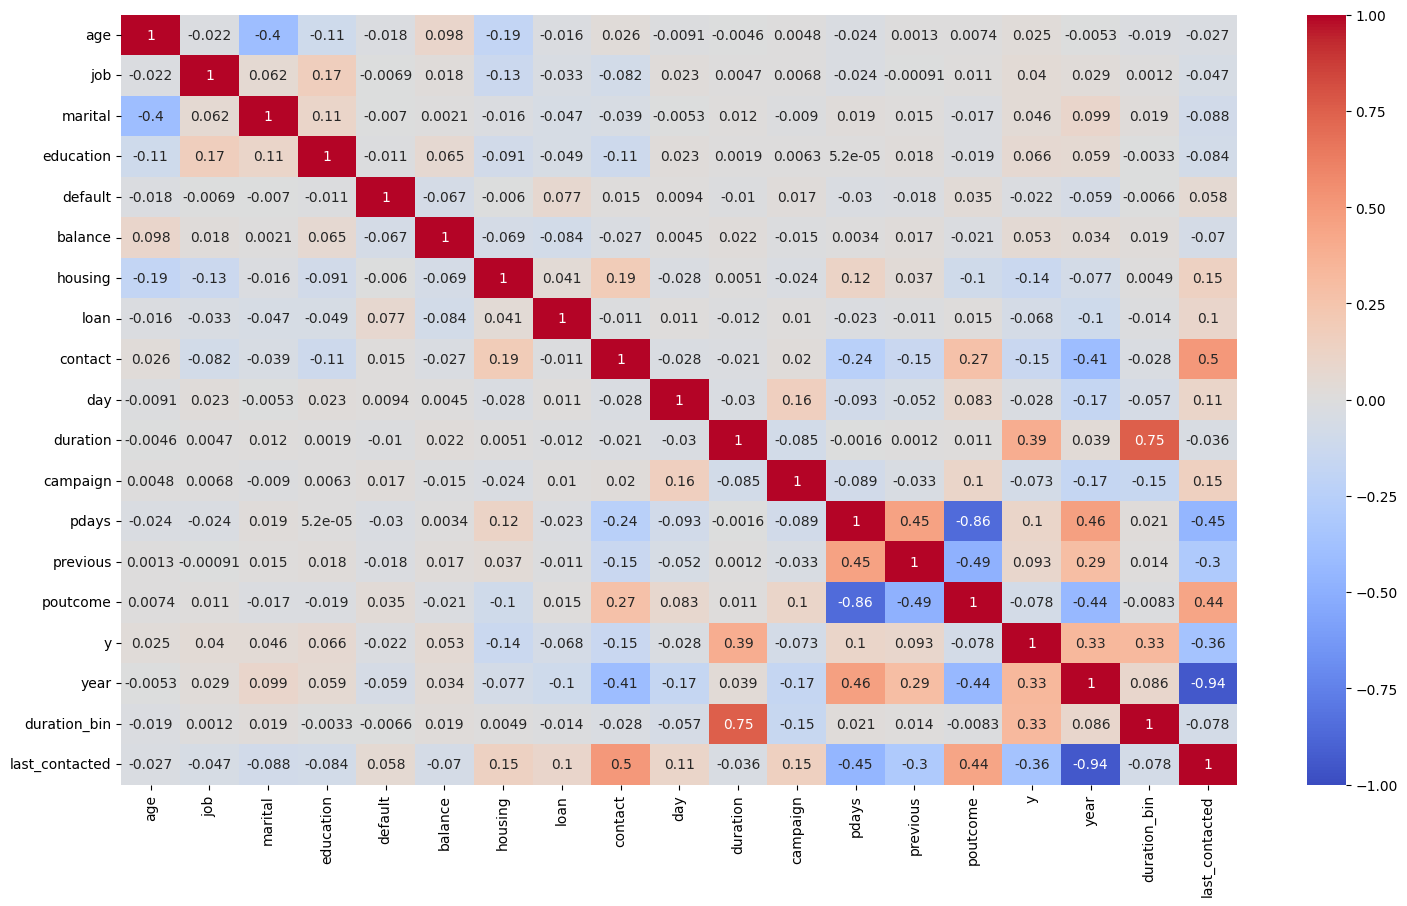

C:\Users\etiem\AppData\Local\Temp\ipykernel_131768\4241103605.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')


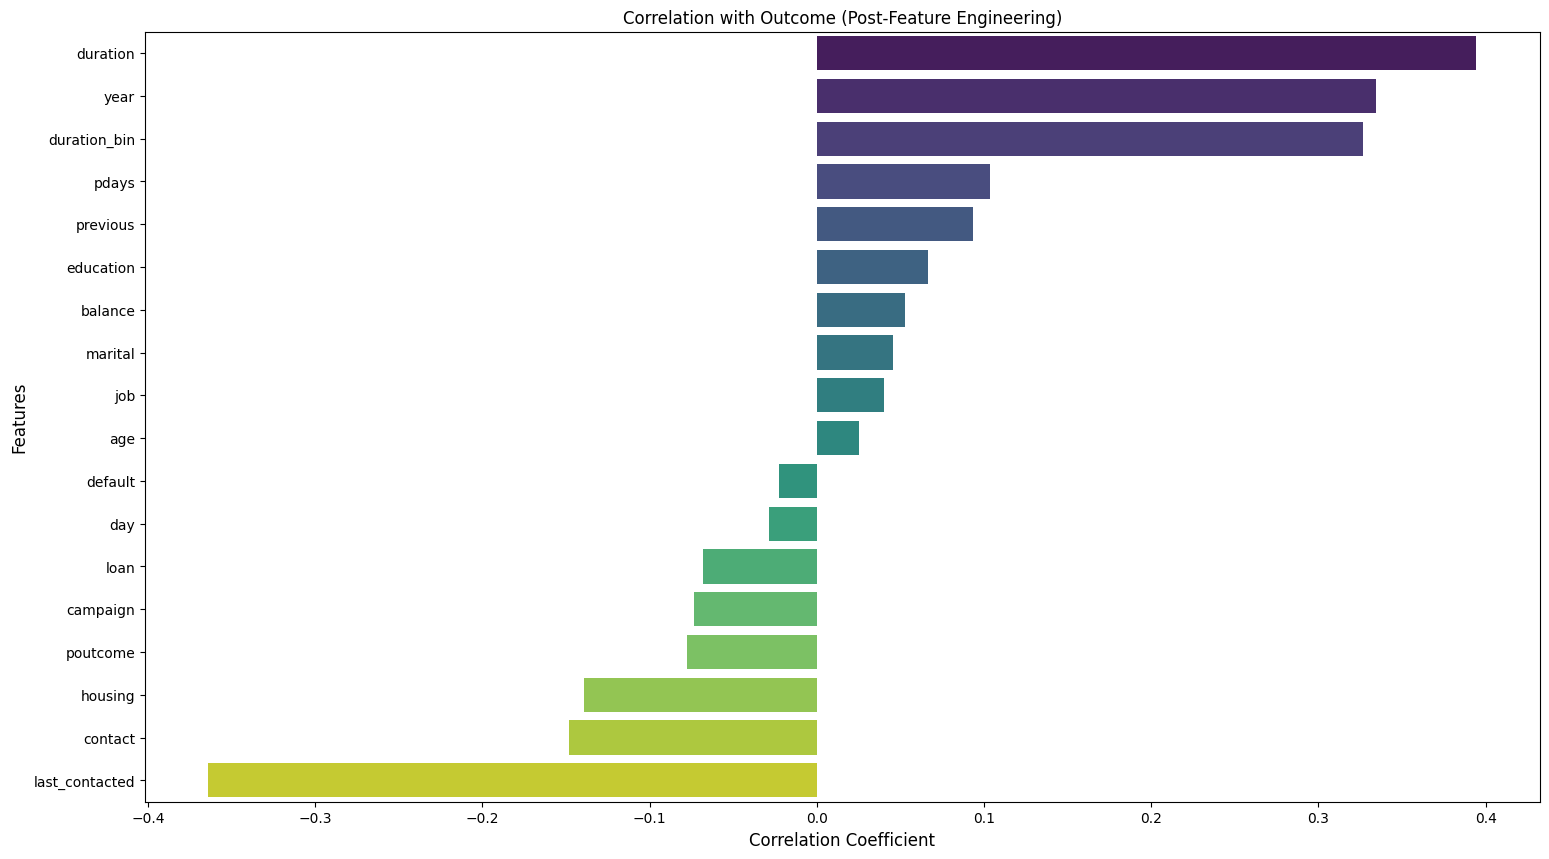

In [32]:
# Correlation matrix and heatmap with the multiple encoded variables

corr_matrix = enc_df.corr(numeric_only=True)
sub_corr = corr_matrix['y'].drop('y').sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#Correlation Matrix
plt.figure(figsize=(18,10))
sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')
plt.title('Correlation with Outcome (Post-Feature Engineering)')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

## Model Building

In [33]:
# Features used for the models
categorical = ['housing', 'contact']
numerical = ['duration', 'pdays', 'previous', 'year', 'last_contacted']

target = ['y']

X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical], enc_df[target], test_size=0.3, random_state=42)

In [34]:
#Preprocessing pipeline

catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical)])

Intial Models - Logreg; KNN

In [35]:
#Logistic regression Model - Basic

logreg = Pipeline(steps=[('preprocessor', preprocessor), ('logistic', LogisticRegression())])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

Accuracy:  0.897817752875258
Precision:  0.6299019607843137
Recall:  0.3216520650813517
F1:  0.4258492129246065


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Results are quite low given the varibles fed into the model. Precision is lackluster leading to only a 60% amount of True positives the model is predicting. Recall is very low (31%) which signifies the model is predicting a high amount of false negatives. For the business this would be costly due to the model not being able to identify target users who would subscribe to the term deposit and therefore it would have a direct impact on revenue. In order for this model to be efficient, Recall should be prioritized and increased to minimize the volume of false negatives to capture as many subscribers at possible, even if its at a cost of allowing some false positives.

In [36]:
# Parameter tuning and grid search for Logistic Regression

param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'elasticnet'],
    'logistic__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Best hyperparameters for Logistic Regression: {'logistic__C': 100, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


In [70]:
#Final pipeline for Logistic 

logreg = Pipeline(steps= [('preprocessor', preprocessor), ('logistic', LogisticRegression(C=100, penalty='l1', solver='saga'))])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_logreg_grid = classification_report(y_test, pred)
print(report_logreg_grid)

Accuracy: 0.8971580227800509
Precision: 0.6390328151986183
Recall Score: 0.3391384051329056
F1 Score: 0.4431137724550898
Cross Validation F1 Scores: [0.46745562 0.42944785 0.40372671 0.45481928 0.40971168 0.46439628
 0.3923445  0.45092025 0.48809524 0.48421053]
Mean cross validation F1 Score: 0.4445127935862915
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.64      0.34      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [38]:
#KNN model - Basic

knn = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.9017251548215865
Precision:  0.5973548861131521
Recall:  0.5087609511889862
F1:  0.5495099695843191


In [39]:
#Parameter tuning and Grid Search for KNN

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Best hyperparameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [69]:
#Final Pipeline for KNN

knn = Pipeline(steps= (['preprocessor', preprocessor], ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance'))))

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_knn_grid = classification_report(y_test, pred)
print(report_knn_grid)

Accuracy:  0.8937299568727193
Precision:  0.5684210526315789
Recall:  0.49495875343721357
F1:  0.5291523762861342
Cross Validation F1 Scores: [0.54233129 0.53874539 0.53061224 0.51       0.5275     0.53952321
 0.50960307 0.5184244  0.51548947 0.56925032]
Mean cross validation F1 Score: 0.5301479386990439
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.57      0.49      0.53      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.72      0.73      9043
weighted avg       0.89      0.89      0.89      9043



Random Forest

In [41]:
#Random Forest - Basic

rf = Pipeline(steps=[('preprocessor', preprocessor), ('rf', RandomForestClassifier())])

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy:  0.9031259215570628
Precision:  0.5960757780784844
Recall:  0.5513141426783479
F1:  0.5728218465539662


In [42]:
# Random Forest Parameter tuning and grid search

# Define hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

# Major drawback of this model is how long it runs versus its actual results; this model took over 4 minutes to process with very mediocre results

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

KeyboardInterrupt: 

In [68]:
# Final Random Forest Pipeline

rf = Pipeline(steps = (['preprocessor', preprocessor], ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100))))

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_rf_grid = classification_report(y_test, pred)
print(report_rf_grid)

Cross Validation F1 Scores: [0.54233129 0.53874539 0.53061224 0.51       0.5275     0.53952321
 0.50960307 0.5184244  0.51548947 0.56925032]
Mean cross validation F1 Score: 0.5301479386990439
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7952
           1       0.64      0.52      0.58      1091

    accuracy                           0.91      9043
   macro avg       0.79      0.74      0.76      9043
weighted avg       0.90      0.91      0.90      9043



AdaBoost

In [44]:
#AdaBoost - Basic

ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])

ada.fit(X_train, y_train)
pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.8975228546151578
Precision:  0.631979695431472
Recall:  0.311639549436796
F1:  0.41743503772003354


In [45]:
#Grid search and parameter tuning for Adaboost model

param_grid = {
    'ada__n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'ada__learning_rate': [0.01, 0.1, 1, 1.5],  # Learning rate controls the contribution of each weak learner
    'ada__algorithm': ['SAMME', 'SAMME.R']  # Different boosting algorithms
}

ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters:  {'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1.5, 'ada__n_estimators': 200}
Best F1 Score:  0.49737398317043785


In [46]:
#Final pipeline for Ada boost with best params

ada = Pipeline(steps = (['preprocessor', preprocessor], ('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.5, n_estimators=100))))

ada.fit(X_train, y_train)
pred = ada.predict(X_test)

crossVal = cross_val_score(ada, X_train, y_train, cv = 10, scoring = 'f1')

print('Cross Validation F1 Scores: ', crossVal)
print('Mean Cross Validation F1 Scores', np.mean(crossVal))

report_ada_grid = classification_report(y_test, pred)
print(report_ada_grid)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

Cross Validation F1 Scores:  [0.46722689 0.46075085 0.48148148 0.47452229 0.50246305 0.50167224
 0.49491525 0.49657534 0.49919485 0.52129472]
Mean Cross Validation F1 Scores 0.4900096976097289
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.64      0.38      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



Ada boost after parameter tuning had the second best score in comparison to the Random Forest Classifier. Precision increased by 1 and recall had the same value. Having similar performance to the Random Forest model, the overall feedback would be the AdaBoost was much more efficient in training the models and making predictions at a fraction of the time in comparison as well. 

AdaBoost took 30 seconds for grid search vs Random Forest where it took almost 10 minutes to process.

Bagging

In [47]:
##Bagging model with decision tree classifier

# Replace 'base_estimator' with 'estimator'
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

# Train the model
bagging_clf.fit(X_train, y_train)

# Predict using the test set
y_pred = bagging_clf.predict(X_test)

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11966
           1       0.59      0.50      0.54      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.73      0.74     13564
weighted avg       0.89      0.90      0.90     13564



In [48]:
# Bagging with SVC as base estimator

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Apply Random Oversampling (convert y_train to 1D array using .ravel())
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train.values.ravel())

# Create the Bagging Classifier using SVC as the base estimator
bagging_clf = BaggingClassifier(estimator=SVC(), random_state=42)

# Define a reduced parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10],  # Reduced the number of estimators for faster processing
    'max_samples': [0.8],  # Fixed max_samples to reduce grid search combinations
    'bootstrap': [True]    # Fixed bootstrap to True for simplicity
}

# Perform Grid Search with reduced cv (cv=3) and parallel processing (n_jobs=-1)
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Predict with the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.88     11966
           1       0.36      0.89      0.52      1598

    accuracy                           0.80     13564
   macro avg       0.67      0.84      0.70     13564
weighted avg       0.91      0.80      0.83     13564



In [49]:
# Bagging with random forest as the base estimator
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [10, 20],  # Reduced number of trees
    'max_samples': [0.7, 1.0],  # Reduced number of max_samples
    'max_features': [0.7, 1.0],  # Reduced number of max_features
    'bootstrap': [True]  # Fixed to True, avoiding extra combination checks
}

# Create a Bagging Classifier with RandomForestClassifier as base estimator
bagging_clf = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

# Use GridSearchCV with reduced cross-validation folds (cv=3)
grid_search = GridSearchCV(bagging_clf, param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
baggingrfr_model = grid_search.best_estimator_
y_pred = baggingrfr_model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters: {'bootstrap': True, 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 20}
Best Score: 0.9049198976206276
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     11966
           1       0.64      0.57      0.60      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.76      0.78     13564
weighted avg       0.91      0.91      0.91     13564



In [50]:
#Grid search and hyper parameter tuning with Bagging classifer using the decision tree classifier - (Chosen because it was the best)

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees
    'max_samples': [0.5, 1.0],      # Fraction of samples to draw for each base estimator
    'max_features': [0.5, 1.0],     # Fraction of features to draw for each base estimator
    'bootstrap': [True, False],     # Whether samples are drawn with or without replacement
    'estimator__max_depth': [3, 5, 10]  # Max depth of the decision tree
}

# Create a Bagging Classifier with a Decision Tree base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(bagging_clf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Hyperparameters: {'bootstrap': True, 'estimator__max_depth': 10, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best Score: 0.9100706320138723
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95     11966
           1       0.64      0.59      0.61      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.77      0.78     13564
weighted avg       0.91      0.91      0.91     13564



In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

# Constrained decision tree with balanced class weights
base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight='balanced')

# Bagging classifier with tuned parameters
bagging_clf = BaggingClassifier(
    estimator=base_estimator, 
    n_estimators=50, 
    max_samples=0.8,  # Subsample data to introduce variance
    max_features=0.8,  # Use a subset of features
    random_state=42
)

# Create the pipeline including SMOTE and Bagging Classifier
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42, k_neighbors=3)),  # Apply SMOTE only on training data
    ('classifier', bagging_clf)  # Use Bagging Classifier
])

# Step 3: Train the model
pipeline.fit(X_train, y_train)

# Step 4: Predictions and Evaluation on Training Set
# Predict on the training set (after applying SMOTE to the training data)
y_train_pred = pipeline.predict(X_train)

# Generate the classification report on the training set
train_report = classification_report(y_train, y_train_pred)
print("\nClassification Report (Training Set):")
print(train_report)

# Calculate and print the F1 score on the training set
train_f1_score = f1_score(y_train, y_train_pred)
print(f"Training F1 Score: {train_f1_score:.4f}")

# Step 5: Predictions and Evaluation on Test Set
# Predict on the test set (without applying SMOTE to the test data)
y_test_pred = pipeline.predict(X_test)

# Generate the classification report on the test set
test_report = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):")
print(test_report)

# Calculate and print the F1 score on the test set
test_f1_score = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {test_f1_score:.4f}")

C:\Users\etiem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     27956
           1       0.44      0.90      0.59      3691

    accuracy                           0.86     31647
   macro avg       0.71      0.88      0.75     31647
weighted avg       0.92      0.86      0.87     31647

Training F1 Score: 0.5934

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     11966
           1       0.44      0.90      0.59      1598

    accuracy                           0.85     13564
   macro avg       0.71      0.87      0.75     13564
weighted avg       0.92      0.85      0.87     13564

Test F1 Score: 0.5876


## Voting Classifier

A Voting Classifier was created combining multiple models (Random Forest, KNN, Bagging with Decision Trees) to create an ensemble classifier.

The Voting Classifier consists of:

Softing Voting: Averages the predicted probabilites across models and assigns the class with the highest probability.

Hard Voting : Assigns the class based on the majority vote across models

In [73]:
# Voting Classifier - SMOTE

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    enc_df[categorical + numerical], enc_df[target], test_size=0.2, random_state=42
)

# Apply preprocessing to X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the preprocessed training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_preprocessed, y_train)

# Convert the SMOTE output back to a DataFrame with the correct column names
X_train_smote = pd.DataFrame(X_train_smote, columns=preprocessor.get_feature_names_out())

# Define the classifiers

# Bagging classifier with Decision Tree base estimator
base_estimator = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight='balanced')
bagging_clf = BaggingClassifier(
    estimator=base_estimator, 
    n_estimators=50, 
    max_samples=0.8, 
    max_features=0.8, 
    random_state=42
)

# Random Forest and KNN (no Logistic Regression)
rf_clf = RandomForestClassifier(class_weight='balanced')
knn_clf = KNeighborsClassifier()

# Define hyperparameter grids for KNN and Random Forest
knn_params = {'n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

# Random Forest and KNN (no Logistic Regression)
rf_clf = RandomForestClassifier(class_weight='balanced')
knn_clf = KNeighborsClassifier()

# Define hyperparameter grids for KNN and Random Forest
knn_params = {'n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20, 30, 50]}

# Tuning Random Forest
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_smote, y_train_smote)

# Tuning KNN
knn_grid = GridSearchCV(knn_clf, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_smote, y_train_smote)



GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 20, 30, 50, 100]},
             scoring='accuracy')

Bagging, Random forest and KNN were used to build a voting classifier, an ensemble of decision trees, and class_weight='balanced' ensures handling of imbalanced classes for random forest.

SMOTE was applied to balance the classes in the training data by generating synthetic samples from the minority class which in this class was 1 by generating synthetic samples

SMOTE was applied to balance the classes in the training data by generating synthetic samples from the minority class which in this class was 1 by generating synthetic samples

In [74]:
# Using soft Voting
voting_clf_soft = VotingClassifier(estimators=[
    ('rf', rf_grid.best_estimator_),  # Tuned Random Forest
    ('knn', knn_grid.best_estimator_),  # Tuned KNN
    ('bagging', bagging_clf)  # Bagging classifier
], voting='soft')  # Use soft voting

# Using Hard Voting
voting_clf_hard = VotingClassifier(estimators=[
    ('rf', rf_grid.best_estimator_),  # Tuned Random Forest
    ('knn', knn_grid.best_estimator_),  # Tuned KNN
    ('bagging', bagging_clf)  # Bagging classifier
], voting='hard')  # Use hard voting

# Training soft voting classifier
voting_clf_soft.fit(X_train_smote, y_train_smote)

# Training hard voting classifier
voting_clf_hard.fit(X_train_smote, y_train_smote)

# Preprocess the test set before prediction
X_test_preprocessed = preprocessor.transform(X_test)

# Evaluate both soft and hard voting classifiers
y_pred_soft = voting_clf_soft.predict(X_test_preprocessed)
y_pred_hard = voting_clf_hard.predict(X_test_preprocessed)

print("Soft Voting Classifier Report:")
print(classification_report(y_test, y_pred_soft))

print("Hard Voting Classifier Report:")
print(classification_report(y_test, y_pred_hard))

Soft Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7952
           1       0.50      0.79      0.61      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.77      9043
weighted avg       0.91      0.88      0.89      9043

Hard Voting Classifier Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      7952
           1       0.50      0.80      0.61      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.84      0.77      9043
weighted avg       0.91      0.88      0.89      9043



The models performed well on the majority class (class 0 = No) but struggle with the minority class (class 1 = yes), which was expected for the dataset as it was imbalanced. Softing Voting may offer slightly better generalization for the minority class (1), as it tends to smooth out the prediction process using probability averages, leading to a slightly lower recall comppared to Hard voting. 

The main limitation of this model is the precision for class 1 as the models generates a significant numbers of false positives for class 1 making it unreliable.

Soft Voting provides a smoother decision boundary and slightly better recall for class 1 (0.79) compared to Hard Voting. And as for hard Voting the recall for class 1 is slightly better (0.80) compared to Soft Voting, but both have similar F1-scores for class 1 (0.61), which suggests that while the model perform well on recall, the lower precision brings down the overall F1-score.


## Question 5

KNN and logistic regression struggled due to the complexity of the data and the class imbalance, with KNN performing slightly better in recall and Logistic Regression better in precision.

Random Forest provided a balance between precision and recall, performing better than the simpler models but still affected by the class imbalance.

AdaBoost did not perform as well as expected, likely because the boosting mechanism is sensitive to misclassification, particularly in imbalanced datasets.

Bagging classifier with SMOTE showed very high recall, demonstrating its effectiveness at identifying the minority class. However, the trade-off came at the cost of precision, making the model generate a significant numbers of false positives

The models fell within expectations, Bagging and Random Forest performed better because they are ensemble methods designed to handle variance and can deal with imbalanced datasets better than single models. As for Logistic Regression and KNN they are more sensitive to class imbalance and high dimensionality of the dataset, leading to lower performance, especially for the minority class (Class 1= yes)

Finally, voting model the precision for class 1 (0.50) remained low across both Soft and Hard Voting. This is because the models, especially after applying SMOTE, tended to overpredict class 1, leading to more false positives. SMOTE increased recall at the expense of precision. The recall for class 1 (0.79-0.80) is quite high, this is largely due to the combination of Random Forest and Bagging, which can generalize well on imbalanced datasets when combined with SMOTE.
The F1 score for class 1 (0.61) balances precision and recall. This score indicates that while the model identifies most class 1 instances (high recall), it does so at the cost of precision, leading to some misclassifications (false positives)

Voting classifier generally fell within expectations, by leveraging strengths of different models. Since the models that handles imbalance relatively well (Random Forest, Bagging) were used, it’s not surprising that recall for class 1 was high. However, KNN’s distance-based approach and the class imbalance may have pulled down the precision. SMOTE was applied to helped improve recall for class 1 which came at the cost of precision which is common. Soft and Hard Voting shows similar results, which is expected when the base models are not highly diverse. Soft Voting doesn’t provide huge advantage over Hard Voting in this case.



